In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [2]:
# Jason Rampe 3rd Attractor
@jit(nopython=True)
def Attractor_Calc(x0, y0, n, a, b, c, d):
    
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):
        x[i+1] = np.sin(y[i] * b) + c * np.cos(x[i] * b)
        y[i+1] = np.cos(x[i] * a) + d * np.sin(y[i] * a)
        
    return x, y

In [3]:
def Attractor_Plot(n=10000000, a=-2.76, b=-1.82, c=2.85, d=-0.87, cmap=["gold", "orange"]):
    
    x0, y0 = 0.0, 0.0
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = Attractor_Calc(x0, y0, n, a, b, c, d)
    agg = cvs.points(pd.DataFrame({"x":x, "y":y}), "x", "y")
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=10000000, name='n', start=1, value=10000000)
        [1] FloatSlider(end=2.76, name='a', start=-8.28, value=-2.76)
        [2] FloatSlider(end=1.82, name='b', start=-5.46, value=-1.82)
        [3] FloatSlider(end=8.55, name='c', start=-2.85, value=2.85)
        [4] FloatSlider(end=0.87, name='d', start=-2.61, value=-0.87)
    [1] Row
        [0] PNG(Image, name='interactive00006')
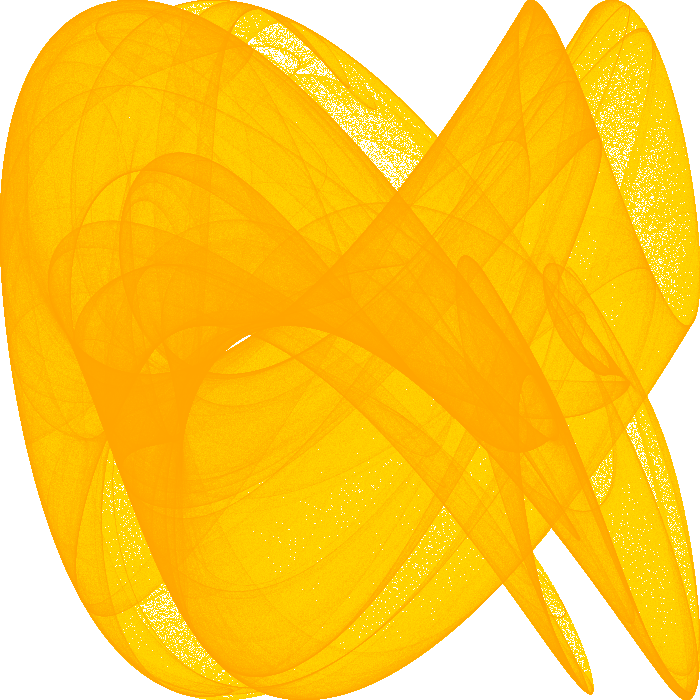

In [4]:
pn.extension()
pn.interact(Attractor_Plot, n=(1, 10000000))